In [4]:
!pip install -U fortran-magic
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [5]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/me.jpg?raw=1" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [8]:
assert ran_the_first_cell, "Oh noes!"

In [7]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [9]:
#example
lista = [4, 'hola',3.2, 1, 7.9, "adios"]
lista

[4, 'hola', 3.2, 1, 7.9, 'adios']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [11]:
#example
primero = lista[0]
segundo = lista[1]
print("primero:", primero)
print("segundo:", segundo)

primero: 4
segundo: hola


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [13]:
#example
ultimo = lista[-1]
penultimo = lista[-2]
print("ultimo:", ultimo)
print("penultimo:", penultimo)

ultimo: adios
penultimo: 7.9


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [19]:
#example
sublista = lista[2:6]
sublista

[3.2, 1, 7.9, 'adios']

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [21]:
#example
cuatro_primeros = lista[:4]
cuatro_primeros

[4, 'hola', 3.2, 1]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [22]:
#example
despues_4 = lista[4:]
despues_4

[7.9, 'adios']

In [25]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [27]:
#example
lista = ['a', 'e', 'i', 'o', 'u']
lista[1:4:2]

['e', 'o']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [29]:
#example
lista[::-1]

['u', 'o', 'i', 'e', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [32]:
#example
lista = ['a', 'e', 'i', 'o', 'u']
print("Antes:", lista)
lista.append("æ")
print("Despues:", lista)

Antes: ['a', 'e', 'i', 'o', 'u']
Despues: ['a', 'e', 'i', 'o', 'u', 'æ']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [33]:
#example
lista = ['a', 'e', 'i', 'o', 'u']
[x + 'i' for x in lista]

['ai', 'ei', 'ii', 'oi', 'ui']

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [34]:
#example
edad = {'Juan': 18, 'Maria': 19, 'David': 20, 'Jose':17}
edad

{'David': 20, 'Jose': 17, 'Juan': 18, 'Maria': 19}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [36]:
#example
edad = {'Juan': 18, 'Maria': 19, 'David': 20, 'Jose':17}
edad['Juana'] = 20
edad

{'David': 20, 'Jose': 17, 'Juan': 18, 'Juana': 20, 'Maria': 19}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [37]:
#example
del edad['Juana']
edad

{'David': 20, 'Jose': 17, 'Juan': 18, 'Maria': 19}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

In [38]:
#example
edad['Juan':20]

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/pacino.gif?raw=1" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [45]:
#example
c = [[1,0,0],
     [0,1,0],
     [0,0,1]]

d = [[3,2],
     [1,2],
     [9,7]]

In [42]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/gross.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [46]:
#example
%%time

matmul(c,d)

CPU times: user 29 µs, sys: 3 µs, total: 32 µs
Wall time: 37.9 µs


[[3, 2], [1, 2], [9, 7]]

In [47]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.723415117207874, 0.6901702949679681, 0.3381281394497089],
 [0.5150383312422018, 0.23680936552522736, 0.531524678707206]]

In [51]:
#example
randx = random_matrix(4,4)
randx

[[0.17998386850266668,
  0.9674179694378343,
  0.6580739034757165,
  0.251825398136182],
 [0.07585529440153349,
  0.725181571904706,
  0.9848963396340543,
  0.9143354315257194],
 [0.44624374585362325,
  0.4934182028708253,
  0.3939201546087012,
  0.30165882047715964],
 [0.47718712860732937,
  0.2133881441456652,
  0.805295470987667,
  0.4387720395932958]]

In [49]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 11.3 s, sys: 50.6 ms, total: 11.4 s
Wall time: 11.4 s


In [48]:
#example
%%time
randc = random_matrix(500,200)
randd = random_matrix(200,500)
x = matmul(randc,randd)

CPU times: user 16.6 s, sys: 59.8 ms, total: 16.6 s
Wall time: 16.7 s


In [55]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [50]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [52]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [53]:
#example

list_data_2 = [float(i) for i in range(3000)]
array_data_2 = np.array(list_data_2)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.95 ms


333328333350000.0

In [56]:
#example
%%time
python_dot_product(list_data_2, list_data_2)

CPU times: user 531 µs, sys: 0 ns, total: 531 µs
Wall time: 803 µs


8995500500.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 181 µs


333328333350000.0

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/sloth.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>


In [57]:
%%time
fortran_dot_product(array_data_2, array_data_2)

CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 26 µs


8995500500.0

## Why is the Python Version so Much Slower?

In [64]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [69]:
#example
mul_elemwise([3,2,1], ['p', (7j + 3) , 3.14])

['ppp', (6+14j), 3.14]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              3 LOAD_NAME                1 (b)
              6 LOAD_NAME                2 (c)
              9 BINARY_MULTIPLY
             10 BINARY_ADD
             11 RETURN_VALUE


In [72]:
#example
source_code2 = '3*x + z'
bytecode2 = compile(source_code2, '', 'eval')
import dis; dis.dis(bytecode2)

  1           0 LOAD_CONST               0 (3)
              2 LOAD_NAME                0 (x)
              4 BINARY_MULTIPLY
              6 LOAD_NAME                1 (z)
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/runaway.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/thisisfine.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [73]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [74]:
#example
data2 = np.array([9,8,7,6])

In [ ]:
data + data

array([2, 4, 6, 8])

In [75]:
#example

data * data

array([ 1,  4,  9, 16])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [76]:
#example
%%time
(array_data_2 * array_data_2).sum()

CPU times: user 302 µs, sys: 0 ns, total: 302 µs
Wall time: 353 µs


8995500500.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [77]:
#example
%%time

array_data_2.dot(array_data_2)

CPU times: user 557 µs, sys: 32 µs, total: 589 µs
Wall time: 1.44 ms


8995500500.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [78]:
#example
%%time
fortran_dot_product(array_data_2, array_data_2)

CPU times: user 16 µs, sys: 1 µs, total: 17 µs
Wall time: 20.3 µs


8995500500.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [81]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [80]:
#example
two_by_two = data2.reshape(2, 2)
two_by_two

array([[9, 8],
       [7, 6]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [82]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [86]:
#example
arr = np.array([9,8,7,6,5,4,3,2,1,11,12,13], dtype='int16').reshape(4, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[ 9  8  7]
 [ 6  5  4]
 [ 3  2  1]
 [11 12 13]]
DType: int16
Shape: (4, 3)
Strides: (6, 2)
Data: b'\t\x00\x08\x00\x07\x00\x06\x00\x05\x00\x04\x00\x03\x00\x02\x00\x01\x00\x0b\x00\x0c\x00\r\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [87]:
#example
data2 = np.arange(20).reshape(4, 5)
data2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [88]:
#example
data2 *data2

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [89]:
#example
np.sqrt(data2)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [90]:
#example
(data2 %2) ==0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [92]:
#example
((data2 % 5) == 0) & ((data2 % 2) == 0)

array([[ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [93]:
#example
data2 @ data2.T

array([[  30,   80,  130,  180],
       [  80,  255,  430,  605],
       [ 130,  430,  730, 1030],
       [ 180,  605, 1030, 1455]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [94]:
#example
senos = np.sin(np.linspace(0, 90, 10))
cossenos = np.cos(np.linspace(0, 90, 10))
senos

array([ 0.        , -0.54402111,  0.91294525, -0.98803162,  0.74511316,
       -0.26237485, -0.30481062,  0.77389068, -0.99388865,  0.89399666])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [96]:
#example
senos[3]

-0.9880316240928618

In [ ]:
sines[:3]  # First three elements  

array([ 0.        ,  0.34185385,  0.64251645])

In [97]:
#example
senos[:5]

array([ 0.        , -0.54402111,  0.91294525, -0.98803162,  0.74511316])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [98]:
#example
senos[3:]

array([-0.98803162,  0.74511316, -0.26237485, -0.30481062,  0.77389068,
       -0.99388865,  0.89399666])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [99]:
#example
senos[::4]

array([ 0.        ,  0.74511316, -0.99388865])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [101]:
#example
print("senos:\n", senos)
print("senos > 0.5:\n", senos > 0.5)
print("senos[senos > 0.5]:\n", senos[senos > 0.5])

senos:
 [ 0.         -0.54402111  0.91294525 -0.98803162  0.74511316 -0.26237485
 -0.30481062  0.77389068 -0.99388865  0.89399666]
senos > 0.5:
 [False False  True False  True False False  True False  True]
senos[senos > 0.5]:
 [0.91294525 0.74511316 0.77389068 0.89399666]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [102]:
#example
print(senos)
senos[[0,3,6]]

[ 0.         -0.54402111  0.91294525 -0.98803162  0.74511316 -0.26237485
 -0.30481062  0.77389068 -0.99388865  0.89399666]


array([ 0.        , -0.98803162, -0.30481062])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [103]:
#example
unsorted_data2 = np.array([1,4,-2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [104]:
#example
sort_indices2 = np.argsort(unsorted_data2)
sort_indices2

array([2, 0, 1])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [105]:
#example
unsorted_data2[sort_indices2]

array([-2,  1,  4])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [106]:
#example
market_caps2 = np.array([5,6,-2,61,7])
assets2 = np.array(['a', 'b', 'c', 'd', 'e'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [107]:
#example
sort_by_mcap2 = np.argsort(market_caps2)
assets2[sort_by_mcap2]

array(['c', 'a', 'b', 'e', 'd'], dtype='<U1')

In [108]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [110]:
data2 = np.arange(30).reshape(6,5)
data2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [111]:
#example
data2[:3, :2] 

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [113]:
#example
data2[:2, [0,-2]]

array([[0, 3],
       [5, 8]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [115]:
#example
data2[(data2[:, 0]%2)==0]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [123]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [124]:
variance(np.random.standard_normal(1000))

1.0179713829908605

In [128]:
#example
variance(np.random.standard_normal(50))

0.7727174305316383

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [118]:
data = np.arange(30)
data.mean()

14.5

In [130]:
#example
data2 = np.arange(100)
data2.mean()

49.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [119]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [131]:
#example
data2 = np.arange(100).reshape(10, 10)
data2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [120]:
data.mean()

14.5

In [132]:
#example
data2.mean()

49.5

In [121]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [138]:
#example
data2.mean(axis = 0)

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

In [122]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [139]:
#example
data2.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5, 94.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [140]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [146]:
#example
row2 = np.array([9,8,7,6])
column2 = np.array([[3],[2],[1]])
print("Row:\n", row2, sep='')
print("Column:\n", column2, sep='')

Row:
[9 8 7 6]
Column:
[[3]
 [2]
 [1]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [147]:
#example
row2 + column2

array([[12, 11, 10,  9],
       [11, 10,  9,  8],
       [10,  9,  8,  7]])

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/broadcasting.png?raw=1" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [148]:
#example
print("Data:\n", data2, sep='')
print("Mean:\n", data2.mean(axis=0), sep='')
print("Data - Mean:\n", data2 - data2.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
Mean:
[45. 46. 47. 48. 49. 50. 51. 52. 53. 54.]
Data - Mean:
[[-45. -45. -45. -45. -45. -45. -45. -45. -45. -45.]
 [-35. -35. -35. -35. -35. -35. -35. -35. -35. -35.]
 [-25. -25. -25. -25. -25. -25. -25. -25. -25. -25.]
 [-15. -15. -15. -15. -15. -15. -15. -15. -15. -15.]
 [ -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.  -5.]
 [  5.   5.   5.   5.   5.   5.   5.   5.   5.   5.]
 [ 15.  15.  15.  15.  15.  15.  15.  15.  15.  15.]
 [ 25.  25.  25.  25.  25.  25.  25.  25.  25.  25.]
 [ 35.  35.  35.  35.  35.  35.  35.  35.  35.  35.]
 [ 45.  45.  45.  45.  45.  45.  45.  45.  45.  45.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/unicorn.jpg?raw=1" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/panda-wrangling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/pandas_logo.png?raw=1" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [163]:
#example
serie = pd.Series(index = ['a', 'b', 'c', 'd', 'e'],data=[9,8,7,6,5])
serie

a    9
b    8
c    7
d    6
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [164]:
#example
print("The index is:", serie.index)
print("The values are:", serie.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [9 8 7 6 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [165]:
#example
serie.iloc[0]

9

In [ ]:
# ... or by label.
s.loc['a']

1

In [167]:
#example
serie.loc["d"]

6

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [168]:
#example
serie.iloc[:4]

a    9
b    8
c    7
d    6
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [170]:
#example
serie.loc[:'d']

a    9
b    8
c    7
d    6
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [171]:
#example
serie.iloc[[0,-1]]

a    9
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [173]:
#example
serie.loc[serie > 6]

a    9
b    8
c    7
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [174]:
#example
other_serie = pd.Series({'a': 20.0, 'c': 35.3, 'd': 41.3, 'z': 38.0})
other_serie

a    20.0
c    35.3
d    41.3
z    38.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [175]:
serie + other_serie

a    29.0
b     NaN
c    42.3
d    47.3
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [177]:
#example
(serie + other_serie).fillna(0.0)

a    29.0
b     0.0
c    42.3
d    47.3
e     0.0
z     0.0
dtype: float64

In [180]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [179]:
#example
aapl = pd.read_csv('AAPL.csv', parse_dates=['Close'], index_col='Close')
aapl.head()

,Date,Adj Close,High,Low,Open,Volume
Close,,,,,,
30.572857,2010-01-04,27.613066,30.642857,30.340000,30.490000,123432400.0
30.625713,2010-01-05,27.660807,30.798571,30.464285,30.657143,150476200.0
30.138571,2010-01-06,27.220825,30.747143,30.107143,30.625713,138040000.0
30.082857,2010-01-07,27.170504,30.285715,29.864286,30.250000,119282800.0
30.282858,2010-01-08,27.351143,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [181]:
#example
aapl.iloc[:3, :3]


,Adj Close,Close,High
Date,,,
2010-01-04,27.613066,30.572857,30.642857
2010-01-05,27.660807,30.625713,30.798571
2010-01-06,27.220825,30.138571,30.747143


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [182]:
#example
aapl.loc[pd.Timestamp('2011-04-01'):pd.Timestamp('2011-05-01'), ['Close', 'Volume']]

,Close,Volume
Date,,
2011-04-01,49.222858,104665400.0
2011-04-04,48.741428,115021200.0
2011-04-05,48.412857,120682800.0
2011-04-06,48.291428,100634800.0
2011-04-07,48.297142,93361800.0
2011-04-08,47.865715,94383800.0
2011-04-11,47.257141,99736700.0
2011-04-12,47.485714,106409800.0
2011-04-13,48.018570,86555000.0


# Rolling Operations

<center><img src="https://github.com/jortegar18/MetNumUN2021II/blob/main/Lab2/images/rolling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

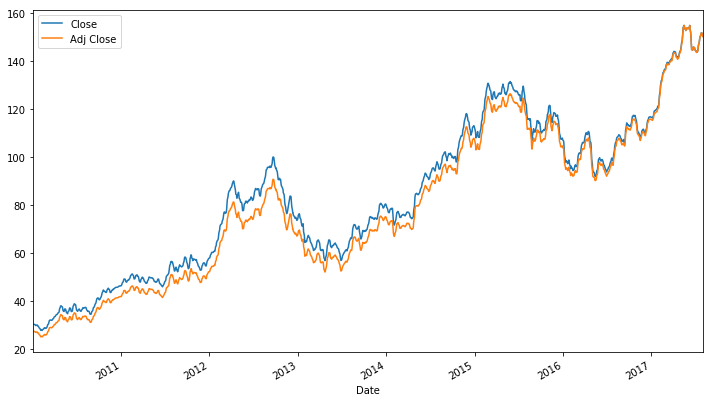

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

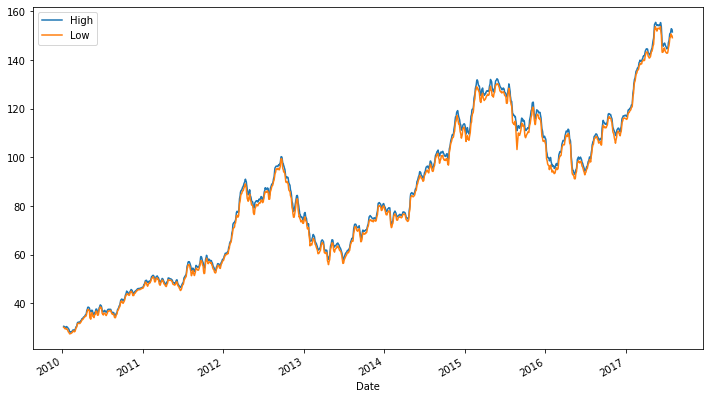

In [183]:
#example
aapl.rolling(5)[['High', 'Low']].mean().plot();

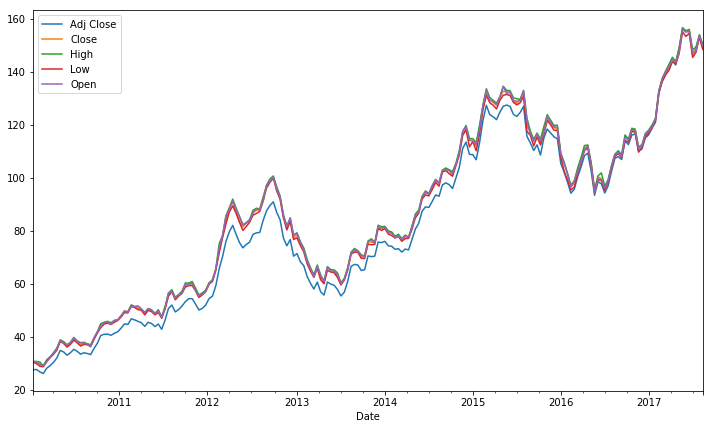

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

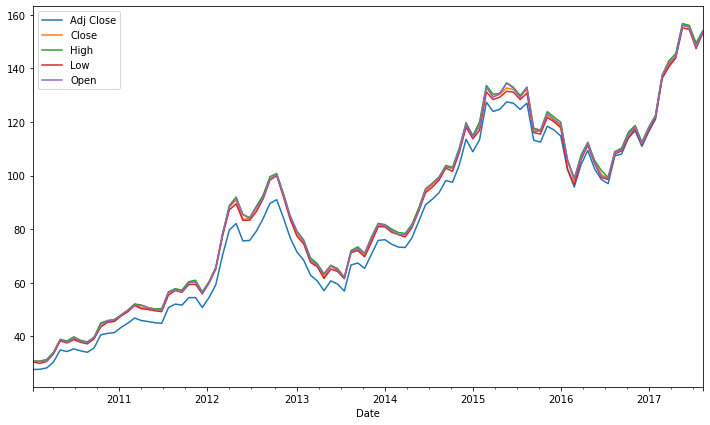

In [190]:
#example
aapl.drop('Volume', axis=1).resample('4W').max().plot();

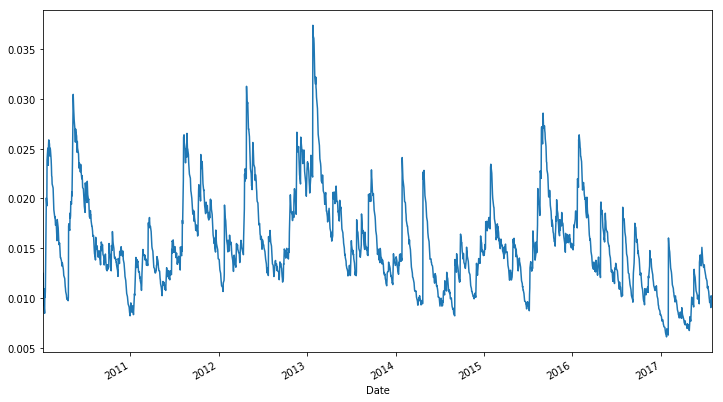

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

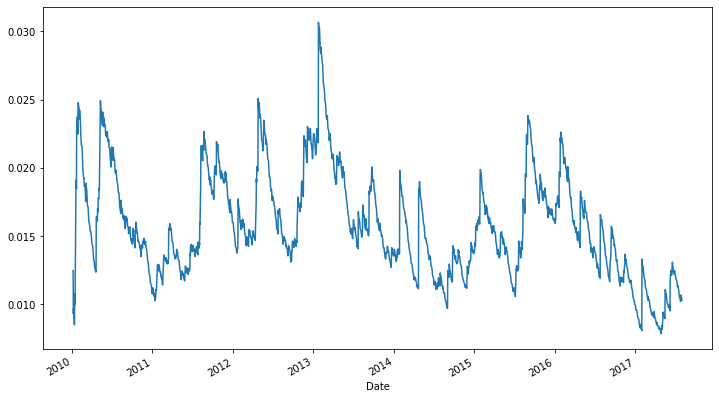

In [192]:
#example
aapl['Close'].pct_change().ewm(span=60).std().plot();

# "Real World" Data

In [194]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [197]:
#example
avocados = read_avocadata('2014', '2017')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [196]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [205]:
avocados['High Price'].dtypes



dtype('float64')

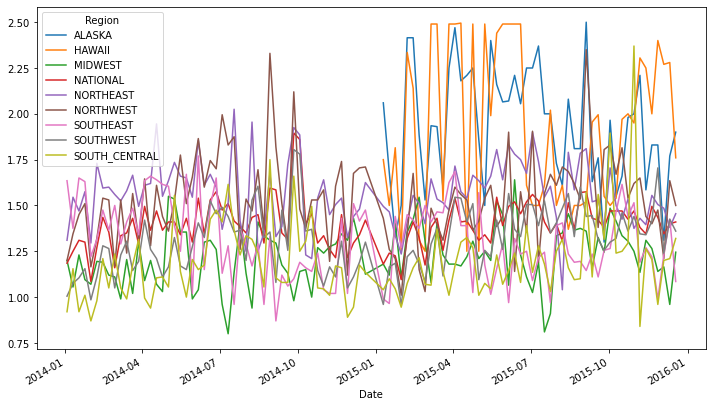

In [195]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

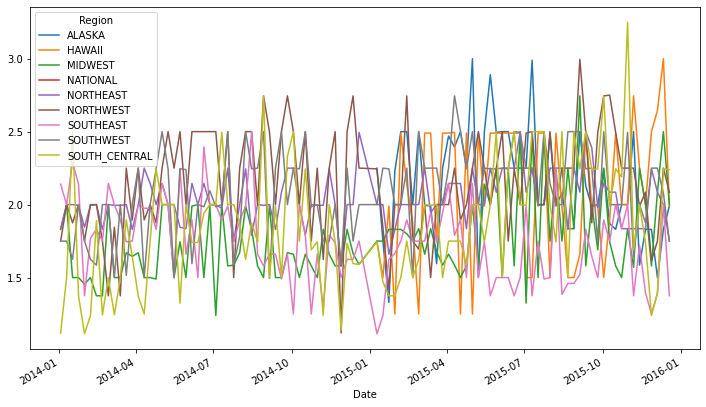

In [208]:
#example
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['High Price'].mean().unstack().ffill().plot();

In [211]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

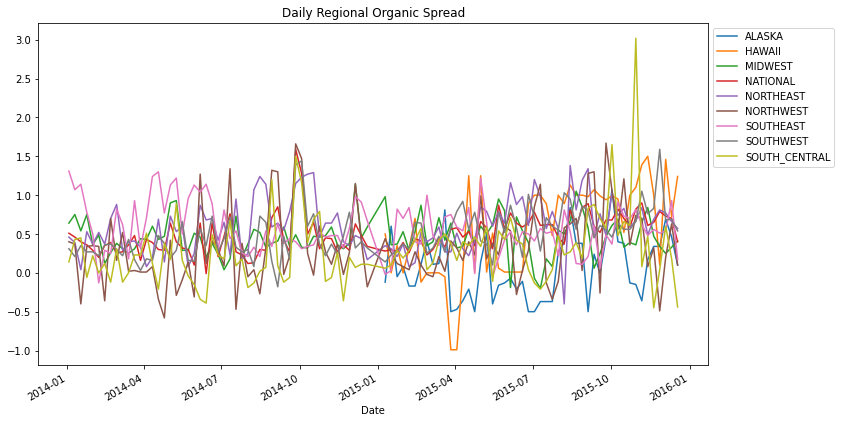

In [212]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

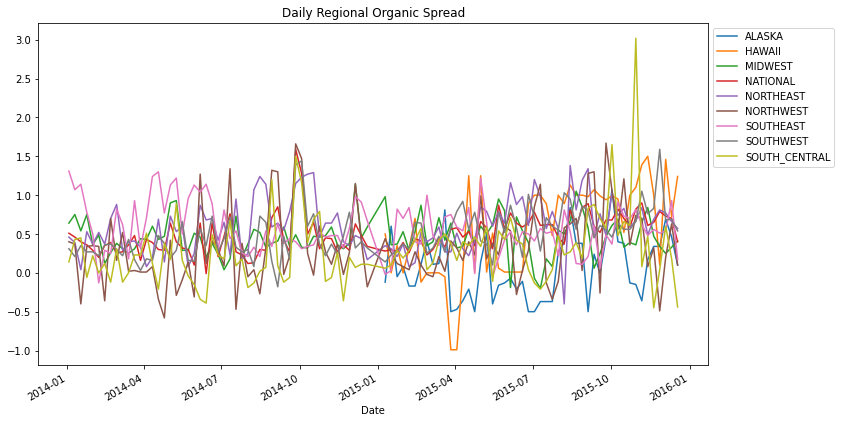

In [213]:
#example
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [216]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [214]:
#example
spread_correlation2 = organic_spread_by_region(hass).corr()
spread_correlation2

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


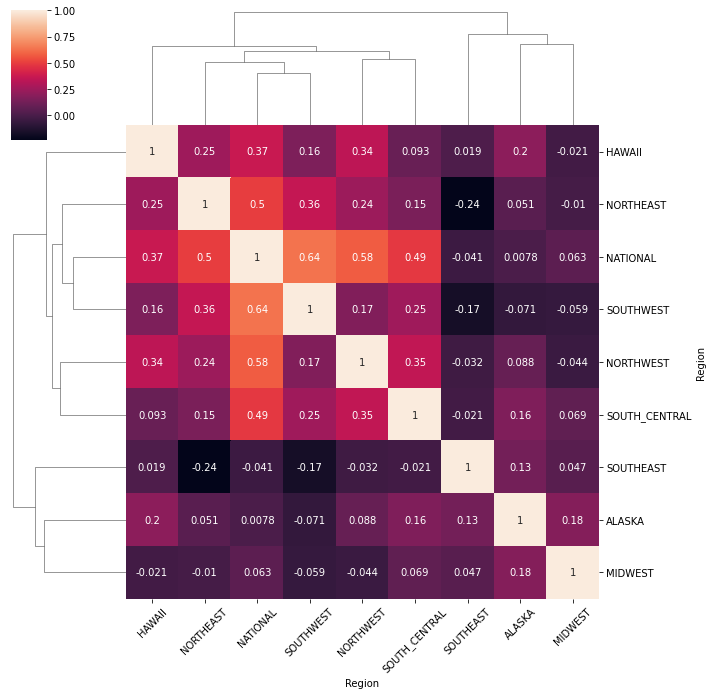

In [217]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

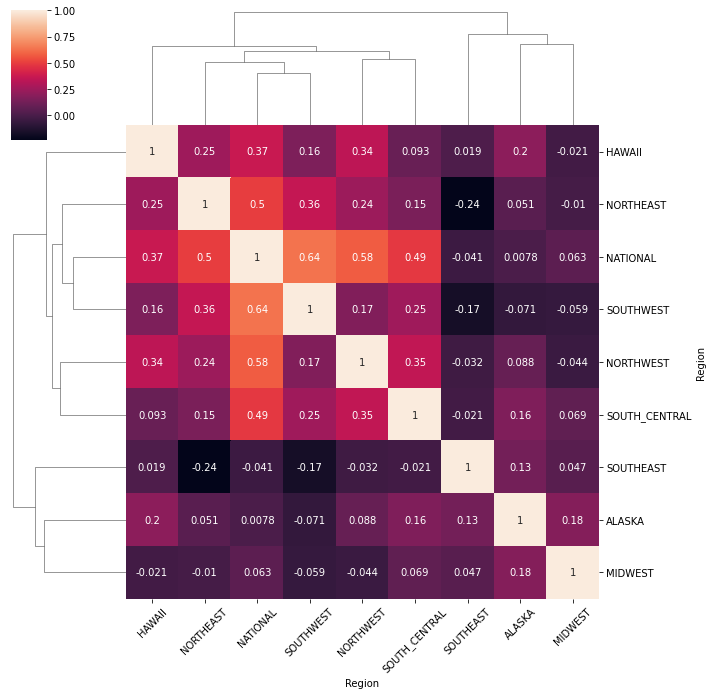

In [218]:
#example
import seaborn as sns
grid = sns.clustermap(spread_correlation2, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!